- 1.) Does age impact salary?
- 2.) Does seniority(length of time playing with a club) impact salary?
- 3.) Does the league you're with impact your salary?
- 4.) Do players with unusual body types have higher or lower salaries?
- 5.) Does nationality impact salary?
- 6.) Does international reputation impact salary?
- 7.) Does contract length positively or negatively impact salary?
- 8.) Overarching question: What features are most important in player salaries?

In [4]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#linear algebra
import numpy as np
import pandas as pd

#helper modules
import acquire
#import prepare
#import model

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

#world bank data
#import wbgapi as wb

#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

#display max columns
pd.set_option('display.max_columns', None)

#use this format specifier exactly AS IS to avoid breaking module, space matters!
#pd.options.display.float_format = '{:20.2f}'.format 
sns.set_style("white")

In [5]:
#how to import function from general 

import sys
 
# the system path
sys.path.append('/Users/juleszara/codeup_data_science/fifa')
 
# importing the function
import prepare
import acquire
import model

In [6]:
#acquire
df = acquire.get_fifa_data()

In [7]:
#prepare
df = prepare.prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After cleaning the data and adding additional columns there are: 98804 rows. 83 cols


In [ ]:
df.head()

In [ ]:
# #subset by gk only
# gk = df.loc[df['club_position'] == 'GK']

# #subset w/o gk
# df = df.loc[df['club_position'] != 'GK']

# #put each year in a different df
# y1 = df[(df.year == 2015)]
# y2 = df[(df.year == 2016)]
# y3 = df[(df.year == 2017)]
# y4 = df[(df.year == 2018)]
# y5 = df[(df.year == 2019)]
# y6 = df[(df.year == 2020)]
# y7 = df[(df.year == 2021)]
# y8 = df[(df.year == 2022)]

In [ ]:
#split into train, validate, and test 
# train = pd.concat([y1,y2,y3,y4,y5])
# validate = pd.concat([y6,y7])
# test = pd.concat([y8])

In [ ]:
df2 = train.loc[df['year'] == 2019]

In [ ]:
fifa_overall = df2.sort_values(['overall'],ascending=False)[:10]
fifa_overall[['short_name','overall','potential','club_name','preferred_foot','club_position']].style.background_gradient(cmap='Greens')

In [ ]:
fifa_potential = df2.sort_values(['potential'],ascending=False)[:10]
fifa_potential[['short_name','overall','potential','club_name','preferred_foot','club_position']].style.background_gradient(cmap='Reds')

# Multivariate Analysis

In [ ]:
sns.lmplot(x = 'ball_control', 
           y = 'dribbling', 
           data = train,
           col = 'preferred_foot',
           scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws = {'color':'red'})

In [ ]:
df.club_name.unique

In [ ]:
pop_clubs = ('Manchester City', 'FC Barcelona',  'Chelsea', 'Real Madrid')

sns.lmplot(x = 'potential', 
           y = 'wage_eur', 
           hue ='club_name', 
           palette =  'tab20',
           data = df.loc[df['club_name'].isin(pop_clubs)], 
           fit_reg = False, 
           size = 7)
plt.title('Comparison of Potential and Salary with Popular Clubs', fontsize = 14)
plt.show()

In [ ]:

sns.lmplot(x = 'potential', 
           y = 'wage_eur', 
           hue = 'club_position', 
           palette =  'tab20',
           data = train.loc[train['club_position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg = False, size = 7)

plt.title('Offensive Players and Salary', fontsize = 14)
plt.show()

In [ ]:
#df.iloc[df.groupby(df['club_position'])['overall'].idxmax()][['club_position', 'short_name', 'age', 'club_name', 'nationality_name']]

In [ ]:
# labels=np.array([
#     "gk_diving",
#     "gk_handling",
#     "gk_kicking",
#     "gk_reflexes",
#     "gk_speed",
#     "gk_positioning",
#     "overall",
#     "potential",
# ])
# stats=gk.loc[2, labels].values
# # fig = px.line_polar(highest_rated, r=stats, theta=labels, line_close=True)
# # fig.update_traces(fill='toself')
# # fig.show()

# fig = go.Figure()

# fig.add_trace(go.Scatterpolar(
#       r=stats,
#       theta=labels,
#       fill='toself',
#       name='J. Oblak'
# ))

# stats=gk.loc[36, labels].values

# fig.add_trace(go.Scatterpolar(
#       r=stats,
#       theta=labels,
#       fill='toself',
#       name='H. Lloris'
# ))

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500,)

# fig.show()

In [ ]:
df.loc[df['short_name'] == 'L. Messi']

In [ ]:
df.isna().sum()

In [ ]:
df.loc[df['short_name'] == 'Cristiano Ronaldo']

In [ ]:
#df.info()

#### Add to prepare

In [ ]:
# #change numerical data to integers
# df.pace = df.pace.astype(int)
# df.shooting = df.shooting.astype(int)
# df.passing = df.passing.astype(int)
# df.dribbling = df.dribbling.astype(int)
# df.defending = df.defending.astype(int)
# df.physic = df.physic.astype(int)
# df.goalkeeping_speed = df.goalkeeping_speed.astype(int)

In [ ]:
df.year.dtype

---

In [ ]:
df.head(1)

In [ ]:
df.nationality_name.nunique()

### Add to Prepare

#### Add income_level column 

In [ ]:
# #select incomeLevel
# income_level = wb.economy.DataFrame()['incomeLevel']

# #select country
# country = wb.economy.DataFrame()['name']

# #turn income into df and join country
# income_level = pd.DataFrame(income_level).join(country)

# #reset index
# income_level = income_level.reset_index()

# #rename columns
# income_level.rename(columns = {'incomeLevel': 'income_level', 'name' : 'nationality_name'}, inplace = True)

# #pd.set_option('display.max_rows', 266)
# #income_level

#### Add to Prepare

In [ ]:
# #inner merge of income_level
# df = pd.merge(df, income_level[['nationality_name', 'income_level']], how = 'left', on = 'nationality_name')

In [ ]:
df.nationality_name.nunique()

In [ ]:
df.head()

In [ ]:
df.income_level.isna().sum()

In [ ]:
df.income_level.value_counts()

In [ ]:
# #see how many null values per country for variables
# df.pivot_table(index = 'nationality_name',
#               values = ['income_level'
#                        ],
#               aggfunc = lambda x:x.isna().sum())

#### Add to Prepare

In [ ]:
# #df.loc[df['column name'] == 'column value', ['col name 2']] = 'input into col 2 based on col 1'

# #Eswatini = Swaziland
# #West Bank and Gaza = Palestine
# #Russian Federation = Russia
# #Kyrgyz Republic = Kyrgyzstan
# #Macao SAR, China = Macau
# #Turkiye = Turkey

# #Add income levels to null values
# df.loc[df['nationality_name'] == 'Cape Verde Islands', ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'China PR', ['income_level']] = 'UMC'
# df.loc[df['nationality_name'] == 'Chinese Taipei', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Congo', ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'Congo DR', ['income_level']] = 'LIC'
# df.loc[df['nationality_name'] == "Côte d'Ivoire", ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'Egypt', ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'England', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Gambia', ['income_level']] = 'LIC'
# df.loc[df['nationality_name'] == 'Guinea Bissau', ['income_level']] = 'LIC'
# df.loc[df['nationality_name'] == 'Hong Kong', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Iran', ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'Korea DPR', ['income_level']] = 'LIC'
# df.loc[df['nationality_name'] == 'Korea Republic', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Kyrgyzstan', ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'Macau', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Montserrat', ['income_level']] = 'UMC'
# df.loc[df['nationality_name'] == 'Northern Ireland', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Palestine', ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'Republic of Ireland', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Russia', ['income_level']] = 'UMC'
# df.loc[df['nationality_name'] == 'Saint Kitts and Nevis', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Saint Vincent and the Grenadines', ['income_level']] = 'UMC'
# df.loc[df['nationality_name'] == 'Scotland', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Slovakia', ['income_level']] = 'HIC'
# df.loc[df['nationality_name'] == 'Swaziland', ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'Syria', ['income_level']] = 'LIC'
# df.loc[df['nationality_name'] == 'São Tomé e Príncipe', ['income_level']] = 'LMC'
# df.loc[df['nationality_name'] == 'Turkey', ['income_level']] = 'UMC'
# df.loc[df['nationality_name'] == 'Venezuela', ['income_level']] = 'LIC'
# df.loc[df['nationality_name'] == 'Wales', ['income_level']] = 'HIC'

In [ ]:
df.income_level.isna().sum()

In [ ]:
# sequence = ['sofifa_id', 'short_name', 'player_positions', 'overall', 'potential',
#        'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
#        'club_team_id', 'club_name', 'league_name', 'league_level',
#        'club_position', 'club_joined', 'club_contract_valid_until',
#        'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
#        'skill_moves', 'international_reputation', 'work_rate', 'pace',
#        'shooting', 'passing', 'dribbling', 'defending', 'physic',
#        'attacking_crossing', 'attacking_finishing',
#        'attacking_heading_accuracy', 'attacking_short_passing',
#        'attacking_volleys', 'skill_dribbling', 'skill_curve',
#        'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
#        'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
#        'movement_reactions', 'movement_balance', 'power_shot_power',
#        'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
#        'mentality_aggression', 'mentality_interceptions',
#        'mentality_positioning', 'mentality_vision', 'mentality_penalties',
#        'defending_marking_awareness', 'defending_standing_tackle',
#        'defending_sliding_tackle', 'goalkeeping_diving',
#        'goalkeeping_handling', 'goalkeeping_kicking',
#        'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
#        'year', 'position']
# df = df.reindex(columns=sequence)

#### Add to prepare

In [ ]:
# #rename columns
# df = df.rename(columns = {'physic': 'physical',
#                         'attacking_crossing':'crossing',
#                                 'attacking_finishing': 'finishing',
#                         'attacking_heading_accuracy': 'heading_accuracy',
#  'attacking_short_passing': 'short_passing',
#  'attacking_volleys': 'volleys',
#  'skill_curve': 'curve',
#  'skill_fk_accuracy':'fk_accuracy',
#  'skill_long_passing': 'long_passing',
#  'skill_ball_control': 'ball_control',
#  'movement_acceleration': 'acceleration',
#  'movement_sprint_speed': 'sprint_speed',
#  'movement_agility': 'agility',
#  'movement_reactions': 'reactions',
#  'movement_balance': 'balance',
#  'power_shot_power': 'shot_power',
#  'power_jumping': 'jumping',
#  'power_stamina': 'stamina',
#  'power_strength' : 'strength',
#  'power_long_shots': 'long_shots',
#  'mentality_aggression': 'aggression',
#  'mentality_interceptions': 'interceptions',
#  'mentality_positioning': 'positioning',
#  'mentality_vision': 'vision',
#  'mentality_penalties': 'penalties',
#  'defending_marking_awareness': 'marking',
#  'defending_standing_tackle': 'standing_tackle',
#  'defending_sliding_tackle': 'sliding_tackle',
#  'goalkeeping_diving': 'gk_diving',
#  'goalkeeping_handling': 'gk_handling',
#  'goalkeeping_kicking': 'gk_kicking',
#  'goalkeeping_positioning': 'gk_positioning',
#  'goalkeeping_reflexes': 'gk_reflexes' ,
#  'goalkeeping_speed': 'gk_speed',
#                         })

In [ ]:
import os
os.getcwd()

#### Add to prepre

In [ ]:
# #add total wage column
# df['total_wage'] = df['value_eur'] + df['wage_eur']

#### Add to prepare

In [ ]:
df.club_contract_valid_until.dtype

In [ ]:
df.club_joined.dtype

In [ ]:
df.head(1)

In [ ]:
#df['sale_date'] = pd.to_datetime(df['sale_date'], format='%d/%m/%y %H:%M:%S')

In [ ]:
# change columns to datetime
df.club_joined = pd.to_datetime(df.club_joined)

#figure out why hh:mm:ss shows up
#df.club_contract_valid_until = pd.to_datetime(df['club_contract_valid_until'], format = '%Y')

In [ ]:
df.head(1)

#### Add to Prepare

In [ ]:
#create age bins players younger than 30 are considered younger, else, older
# df['age_bins'] = pd.cut(df['age'], bins = [0, 29, np.inf], labels = ['younger', 'older'])

---

#### Add to Prepare

In [ ]:
#create height bins

# df['height_bins'] = pd.cut(df['height_cm'], bins = 3, labels = ['short', 'medium', 'tall'])

# #create weight bins
# df['weight_bins'] = pd.cut(df['weight_kg'], bins = 3, labels = ['slim', 'average', 'heavy'])

#### Add to Prepare

In [ ]:
# #add a field position column
# df['field_position'] = df.club_position.map({'ST': 'Forward',
#                                              'CF': 'Forward',
#                                              'LF': 'Forward',
#                                              'LW': 'Forward',
#                                              'RW': 'Forward',
#                                              'LS': 'Forward',
#                                              'RS': 'Forward',
#                                              'LM': 'Midfielder', 
#                                              'RM': 'Midfielder', 
#                                              'LAM': 'Midfielder', 
#                                              'RAM': 'Midfielder', 
#                                              'CAM':'Midfielder', 
#                                              'LDM': 'Midfielder', 
#                                              'RDM': 'Midfielder', 
#                                              'CDM': 'Midfielder', 
#                                              'LCM': 'Midfielder', 
#                                              'RCM': 'Midfielder',
#                                              'CB': 'Defender', 
#                                              'LB': 'Defender', 
#                                              'LCB': 'Defender', 
#                                              'RCB': 'Defender', 
#                                              'RB':'Defender', 
#                                              'LWB': 'Defender', 
#                                              'RWB': 'Defender',
#                                              'GK': 'Goalkeeper',
#                                              'RES': 'Reserves',
#                                              'SUB': 'Subs'  
                                            
#                                             })

In [ ]:
df.height_bins.isna().sum()

In [ ]:
df.weight_bins.isna().sum()

In [ ]:
df.head()

In [ ]:
#train, test, split

train, validate, test = prepare.split(df)

In [ ]:
#train.info(verbose = True)

In [ ]:
pd.set_option('display.max_columns', None)

# Explore (General Analysis)

In [ ]:
df.corr()
#unable to use overall, international reputation for modeling portion

In [ ]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [ ]:
plt.figure(figsize = (12,8))
train.corr()['wage_eur'].sort_values(ascending=False).plot(kind='barh', color='orange')
#plt.figure(figsize= 3,3)
plt.title('Relationship with wages')
plt.xlabel('Relationship')
plt.ylabel('Features')
plt.show()

# 1) Does age impact player salaries?

In [ ]:
#look at age distribution
train.age.hist(grid = False, bins = 30)

In [ ]:
sns.scatterplot(data = train,
               x = 'age',
               y = 'wage_eur',
               hue = 'age_bins')

Pearson's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between age and salary.

𝐻𝑎: There is a linear relationship between age and salary.

In [ ]:
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.age, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

#### Takeaways:

- There is a positive linear relationship between age and salary.

---

# 2) Does seniority(length of time playing with a club) impact salary?

In [ ]:
train.seniority.hist(grid = False, bins = 30)

Spearman's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between seniority and salary.

𝐻𝑎: There is a linear relationship between seniority and salary.

In [ ]:
#seniority not normally distributed, use Spearman's
#set alpha
α = 0.05

#perform test
r, p = spearmanr(train.seniority, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

In [ ]:
train.head(1)

## 3) Does the league a player is with impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: League and salary are independent.

𝐻𝑎: League and salary are not independent.

In [ ]:
train.league_name.value_counts()

In [ ]:
train.groupby('league_name')['wage_eur'].mean().sort_values(ascending = False).head(10)

In [ ]:
#setup crosstab
observed = pd.crosstab(train.league_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

### Are the wages of the English Premier League significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: EPL mean wages are <= than the combined mean wages of all the leagues.

𝐻𝑎: EPL mean wages are > than the combined mean wages of all the leagues.

In [ ]:
#set alpha
α = 0.05

#get sample
epl_sample = train[train.league_name == 'English Premier League'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(epl_sample, overall_mean)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of EPL wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

In [ ]:
sns.scatterplot(data = train,
                x = '')

### 3a) Does the club a player is with impact salary?

In [ ]:
train.groupby('club_name')['wage_eur'].mean().sort_values(ascending = False).head(10)

### Are the wages of FC Barcelona significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: FC Barcelona mean wages are <= than the combined mean wages.

𝐻𝑎: FC Barcelona mean wages are > than the combined mean wages of all the leagues.

In [ ]:
#set alpha
α = 0.05

#get sample
bar_sample = train[train.club_name == 'FC Barcelona'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(bar_sample, overall_mean)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of Barcelona wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

In [ ]:
#only top 10 most pop clubs
#most_pop = ['']

In [ ]:
#create variable w/ well-paying clubs
most_exp = ['FC Barcelona', 'Real Madrid CF', 'Manchester City', 
            'Juventus', 'FC Bayern München', 'Manchester United',
           'Chelsea', 'Liverpool']

## 4) Do physical attributes impact salary?

In [ ]:
train.groupby('club_position')['height_cm', 'wage_eur'].mean().sort_values(by = 'wage_eur', ascending = False)

In [ ]:
train.groupby('club_position')['weight_kg'].mean()

In [ ]:
train.groupby('height_bins')['wage_eur'].mean()

In [ ]:
train.groupby('weight_bins')['wage_eur'].mean()

In [ ]:
train.height_bins.value_counts()

In [ ]:
train.weight_bins.value_counts()

<AxesSubplot:xlabel='height_cm', ylabel='wage_eur'>

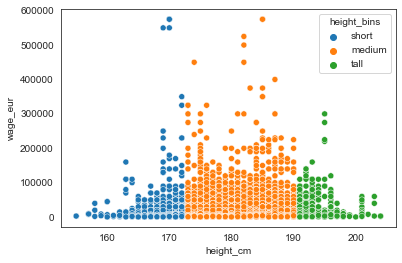

In [26]:
sns.scatterplot(data = train,
                x = 'height_cm',
               y = 'wage_eur',
               hue = 'height_bins')

<AxesSubplot:xlabel='height_cm', ylabel='wage_eur'>

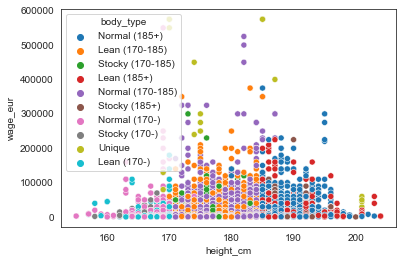

In [27]:
sns.scatterplot(data = train,
                x = 'height_cm',
               y = 'wage_eur',
               hue = 'body_type')

In [28]:
train.loc[train['body_type'] == 'Unique']

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,nationality_id,nationality_name,club_position,position,field_position,club_joined,club_contract_valid_until,body_type,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physical,crossing,finishing,heading_accuracy,short_passing,volleys,skill_dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,gk_speed,year,total_wage,age_bins,height_bins,weight_bins,year_joined,wage_year,league_yr_sum,club_name_yr_sum,seniority,club_position_encoded,work_rate_encoded,preferred_foot_encoded,age_bins_encoded,weight_bins_encoded,body_type_encoded,league_encoded
13294,51257,P. Crouch,ST,75,75,2300000.0,30000.0,33,201,84,1806.0,Stoke City,English Premier League,14,England,ST,Striker,Forward,2011-08-01,2015.0,Unique,Right,3,3,3,Medium/Medium,53,75,68,68,31,69,58,76,78,78,79,68,56,49,62,78,52,54,56,80,29,74,34,70,71,70,73,22,81,74,75,30,25,25,12,13,6,9,13,0,2015,2330000.0,older,tall,average,2011,1560000.0,1.328696e+10,2.399280e+08,4,2,5,2,1,2,1,2
14076,158023,L. Messi,"RW, CF",94,95,111000000.0,550000.0,28,170,72,241.0,FC Barcelona,Spain Primera Division,52,Argentina,RW,Right Wing,Forward,2004-07-01,2018.0,Unique,Left,4,4,5,Medium/Low,92,88,86,95,24,62,80,93,71,88,85,96,89,90,79,96,95,90,92,92,95,80,68,76,59,88,48,22,90,90,74,13,23,21,6,11,15,14,8,0,2016,111550000.0,younger,short,average,2004,28600000.0,8.422970e+09,1.799356e+09,12,1,4,1,2,2,1,5
14079,190871,Neymar,LW,88,93,71500000.0,240000.0,23,174,68,241.0,FC Barcelona,Spain Primera Division,54,Brazil,LW,Left Wing,Forward,2013-07-01,2018.0,Unique,Right,5,5,5,High/Medium,90,80,72,92,30,57,71,85,62,72,83,94,78,78,72,91,91,90,92,86,84,77,61,80,45,70,56,36,87,72,81,21,24,33,9,9,15,15,11,0,2016,71740000.0,younger,medium,slim,2013,12480000.0,8.422970e+09,1.799356e+09,3,3,8,2,2,1,1,5
13268,51257,P. Crouch,ST,76,76,2800000.0,45000.0,34,201,84,1806.0,Stoke City,English Premier League,14,England,SUB,Substitute,Subs,2011-08-01,2017.0,Unique,Right,3,3,3,Medium/Medium,53,76,69,67,32,69,59,77,83,79,80,66,57,50,63,78,52,53,56,78,29,75,34,70,71,71,71,23,80,75,76,31,26,20,13,14,7,10,14,0,2016,2845000.0,older,tall,average,2011,2340000.0,1.328696e+10,2.399280e+08,5,12,5,2,1,2,1,2
14044,158023,L. Messi,RW,93,93,89000000.0,575000.0,29,170,72,241.0,FC Barcelona,Spain Primera Division,52,Argentina,RW,Right Wing,Forward,2004-07-01,2018.0,Unique,Left,4,4,5,Medium/Medium,89,90,86,96,26,61,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,83,68,74,59,88,48,22,93,90,74,13,28,26,6,11,15,14,8,0,2017,89575000.0,younger,short,average,2004,29900000.0,8.422970e+09,1.799356e+09,13,1,5,1,2,2,1,5
14046,190871,Neymar,LW,92,95,109000000.0,450000.0,24,174,68,241.0,FC Barcelona,Spain Primera Division,54,Brazil,LW,Left Wing,Forward,2013-07-01,2021.0,Unique,Right,5,5,5,High/Medium,91,84,78,95,30,56,75,89,62,81,83,96,78,79,75,95,93,90,96,88,82,78,61,70,49,77,56,36,90,80,81,21,24,33,9,9,15,15,11,0,2017,109450000.0,younger,medium,slim,2013,23400000.0,8.422970e+09,1.799356e+09,4,3,8,2,2,1,1,5
14286,20801,Cristiano Ronaldo,"LW, LM, ST",94,94,87000000.0,575000.0,31,185,80,243.0,Real Madrid CF,Spain Primera Division,38,Portugal,LW,Left Wing,Forward,2009-07-01,2018.0,Unique,Right,4,5,5,High/Low,92,92,81,91,33,80,84,93,87,82,88,93,81,77,72,92,91,92,90,96,63,94,95,92,80,92,63,29,94,85,85,22,31,23,7,11,15,14,11,0,2017,87575000.0,older,medium,average,2009,29900000.0,8.422970e+09,1.864824e+09,8,3,7,2,1,2,1,5
13242,51257,P. Crouch,ST,76,76,2100000.0,60000.0,35,201,84,1806.0,Stoke City,English Premier League,14,England,SUB,Substitute,Subs,2011-08-01,2017.0,Unique,Right,3,3,2,Medium/Medium,53,76,69,66,32,70,59,77,83,

In [ ]:
#train.columns.to_list()

In [ ]:
sns.scatterplot(data = train,
               x = 'weight_kg',
               y = 'wage_eur',
               hue = 'weight_bins')

In [ ]:
sns.catplot(data = train,
              x = 'weight_bins',
              y = 'wage_eur',
              hue = 'age_bins',
           kind = 'violin',
            split = False,
            palette = 'husl'
)

In [ ]:
#train.height_bins.hist()

In [ ]:
#train.weight_bins.hist()

In [ ]:
#train.height_cm.hist(bins = 20)

### Is there a linear relationship between height and salary?

Pearson's R

$\alpha$ = .05

$𝐻_{0}$: There is no linear relationship between height and salary.

𝐻𝑎: There is a linear relationship between height and salary.

In [ ]:
#height is normally distributed, use Pearson's
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.height_cm, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

In [ ]:
train.weight_kg.hist(bins = 20)

### Is there a linear relationship between weight and salary?

Pearson's R

$\alpha$ = .05

$𝐻_{0}$: There is no linear relationship between weight and salary.

𝐻𝑎: There is a linear relationship between weight and salary.

In [ ]:
train.weight_kg.hist(grid = False)

In [ ]:
#weight is normally distributed, use Pearson's
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.weight_kg, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

## 5) Does nationality impact salary?

In [ ]:
#pd.set_option('display.max_rows', 177)

In [ ]:
train.groupby('nationality_name')['wage_eur'].mean().sort_values(ascending = False).head(10)

In [ ]:
train.groupby('nationality_name')['wage_eur'].median().sort_values(ascending = False).head(10)

In [ ]:
train.groupby('nationality_name')['wage_eur'].nlargest().sort_values(ascending = False).head(20)

In [ ]:
#train.nationality_name.value_counts()

In [ ]:
#countries = ['Argentina', 'Brazil', 'France', 'Spain', 'Colombia', 'Netherlands', 'Sweden', 'Japan', 'Germany']

In [ ]:
top_mean_wage = ['Dominican Republic', 'Wales', 'Egypt', 'Armenia', 
                 'Gabon', 'Spain', 'Italy', 'Algeria', 'Germany', 'England']

sns.scatterplot(data = train,
               x = '')

### Is there a linear relationship between nationality and salary?

#### Is there a linear relationship between nationality and salary?
$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Nationality and salary are independent.

𝐻𝑎: Nationality and salary are not independent.

In [ ]:
#setup crosstab
observed = pd.crosstab(train.nationality_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P-Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

## 6. Does international reputation impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: International reputation and salary are independent.

𝐻𝑎: International reputation and salary are not independent.

In [ ]:
#international reputation vs. wage
sns.boxplot(data = train,
           x = 'international_reputation',
           y = 'wage_eur')

In [ ]:
#setup crosstab
observed = pd.crosstab(train.international_reputation, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P-Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

## 7. Does contract length positively or negatively impact salary?


$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Contract and salary are independent.

𝐻𝑎: Contract and salary are not independent.

In [ ]:
train.head(1)

In [ ]:
#setup crosstab
observed = pd.crosstab(train.seniority, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

- 8.) Overarching question: What features are most important in player salaries?

---

# General EDA 

In [ ]:
#international reputation vs. wage
sns.boxplot(data = train,
           x = 'international_reputation',
           y = 'wage_eur')

In [ ]:
train.head(5)

In [ ]:
def radar_chart(players = ['V. van Dijk','M. Salah'], title = "Virgil van Dijk Vs Mo Salah"):
    """
    INPUT: 
    players: Player names for comparison(1D-array)
    title : Title for the chart(str)
    
    OUTPUT 
    Plots Radar Chart
    """
    labels = np.array(['pace','shooting', 'passing', 'dribbling','physical','defending'])
    
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint = False)
    angles = np.concatenate((angles,[angles[0]]))

    fig = plt.figure(figsize = (6,6))
    plt.suptitle(title)
    for player in players:
        stats = np.array(df[df.Name == player][labels])[0]
        stats = np.concatenate((stats,[stats[0]]))

        ax = fig.add_subplot(111, polar = True)
        ax.plot(angles, stats, 'o-', linewidth = 2, label = player)
        ax.fill(angles, stats, alpha = 0.25)
        ax.set_thetagrids(angles * 180/np.pi, labels)

    ax.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
radar_chart()

In [ ]:
over_90 = train[train.overall > 90]

print("Number of Players with 90+ overall rating : {}".format(over_90.shape[0]))

radar_chart(players = over_90.short_name, title = "Top Rated Players")

     - Years: 2017, 2018, 2019 
     - Basic IQR? Keep outliers for EDA, remove for modeling
     - cutting down features
     - encode categorical variables to add the Select K Best and RFE 
     - Additional questions come from the results of the RFE and Select K best
     - separate by year before going into clustering
     - Linear regression has to have four conditions: heteroschedasticity, cannot be too closely correlated(over 60%), 
 

- Longitudinal data

- train on the first year of each player, to predict year two, then one and two to predict year three

- All unique players, put name into list, and then do 70/20/10 split, train model on the 70%, on feature engineering only use the past information of one year. Only players that have at least one year past information on a player.

- Sub-setting by players themselves and making sure each player has multiple years will overcome the issue of losing annual stats

- pseudo - code: df[df.player_name.isin(train_list)] <- This is technically the train, test, split. (val_list), (test_list) Will need to remove player names so they aren't duplicated from other sets. Use np.random or python random to get a random picks from the lists. How many names out of list to get 70%, to get 20%, to get 10%. Still only explore on train. (player performance prediction may be better for this) ask OG Ryan : how would we account for budget cuts, are there too many outside variables to be able to accurately predict y-o-y, would having a budget cut encoded column be adequate for the model (would it not inform the model enough bc percentage will vary by league), is overall player wage value too volatile to be used at all?

    - Shift will have to be done player by player and then the dataset recombined
   
       
           - 12,932 players have less than two appearances in the data.
           
           - What percentile does a player stay within base salary-wise? Instead of assigning a salary amount, assign them a percentile
           
           - Separating by year, predicting by year...
           
           -Eriberto - Club budget, league budget per year

In [ ]:
train.head(1)

# Feature Selection

In [ ]:
num_cols = ['club_team_id','age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'pace', 'shooting', 
           'passing', 'dribbling', 'defending', 'physical', 'crossing', 'finishing', 'heading_accuracy', 
           'short_passing', 'volleys', 'skill_dribbling', 'curve', 'fk_accuracy', 'long_passing', 
           'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 
           'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 
           'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 
           'gk_kicking', 'gk_positioning', 'gk_reflexes', 'gk_speed', 'gk_speed', 'potential', 'seniority', 
           'league_encoded', 'club_position_encoded', 'work_rate_encoded', 'preferred_foot_encoded', 
           'age_bins_encoded', 'weight_bins_encoded', 'body_type_encoded']

In [ ]:
#create variables for train
X_train = train[num_cols]

y_train = train.wage_eur

#create variables for validate
X_validate = validate[num_cols]

y_validate = validate.wage_eur

#create variables for test
X_test = test[num_cols]

y_test = test.wage_eur

In [ ]:
scaler = RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#it's an array, turn back into df
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_validate_scaled = pd.DataFrame(X_validate, columns = X_validate.columns)
X_test_scaled = pd.DataFrame(X_test, columns = X_test.columns)

In [ ]:
#it's an array, turn back into df
X = pd.DataFrame(X_train_scaled, columns = X_train.columns)

y = y_train

In [ ]:
X

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 10 features
f_selector = SelectKBest(f_regression, k = 10)

# find the top 10 X's correlated with y (should be scaled!)
f_selector.fit(X, y)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X.iloc[:,feature_mask].columns.tolist()

In [ ]:
f_feature

- Statistical testing on whether a player has a higher or lower short_passing score (for each of the features returned)

---

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=10)

# fit the data using RFE
rfe.fit(X , y)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X.iloc[:,feature_mask].columns.tolist()



In [ ]:
rfe_feature

----

In [ ]:
#create a variable for the top features of each player
player_features = ('acceleration',
                   'aggression',
                   'agility',
                   'balance',
                   'finishing',
                   'gk_diving',
                   'gk_handling',
                   'gk_kicking',
                   'gk_positioning',
                   'gk_reflexes',
                   'heading_accuracy',
                   'interceptions',
                   'jumping',
                   'long_passing',
                   'marking',
                   'penalties'
                   
                  )

for i, val in train.groupby(train['club_position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

# EDA Forwards: ST, LS, RS, LW, RW, LF, CF, SUB, RES

In [9]:
#acquire subset data
goalkeeper_df, forward_df, midfielder_df, defender_df = prepare.acquire_players_by_position(df)

#split
train, validate, test = prepare.split(forward_df)

Train: 10835 rows, 83 cols
Validate: 5010 rows, 83 cols
Test: 2649 rows, 83 cols


# 1. Does age impact player salaries?

<AxesSubplot:xlabel='age', ylabel='wage_eur'>

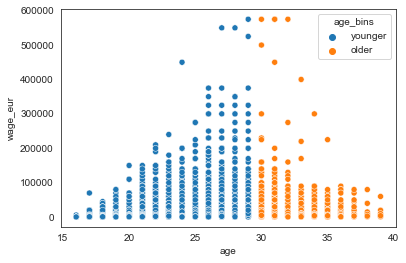

In [10]:
sns.scatterplot(data = train,
               x = 'age',
               y = 'wage_eur',
               hue = 'age_bins')

Pearson's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between age and salary.

𝐻𝑎: There is a linear relationship between age and salary.

In [11]:
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.age, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.193
P-value: 0.000
Reject the null hypothesis.


<AxesSubplot:xlabel='potential', ylabel='wage_eur'>

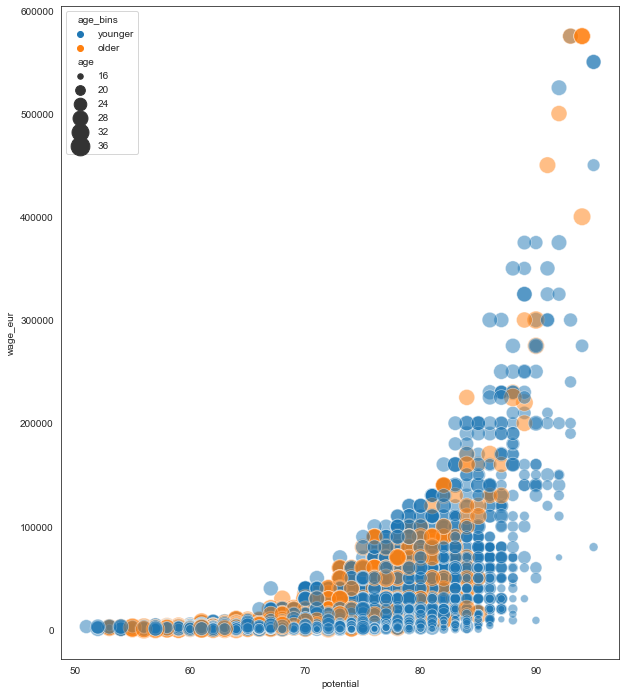

In [21]:
plt.figure(figsize = (10, 12))
sns.scatterplot(data = train, 
               x = 'potential',
               y = 'wage_eur',
               size = 'age',
              hue = 'age_bins',
               sizes = (30, 400),
               alpha = 0.5)

# 2. Does seniority (length of time playing with a club) impact salary?

Spearman's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between seniority and salary.

𝐻𝑎: There is a linear relationship between seniority and salary.

In [22]:
#seniority not normally distributed, use Spearman's
#set alpha
α = 0.05

#perform test
r, p = spearmanr(train.seniority, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.113
P-value: 0.000
Reject the null hypothesis.


## 3. Does the league a player is with impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: League and salary are independent.

𝐻𝑎: League and salary are not independent.

In [23]:
#setup crosstab
observed = pd.crosstab(train.league_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P-Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


### Are the wages of the English Premier League significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: EPL mean wages are <= than the combined mean wages of all the leagues.

𝐻𝑎: EPL mean wages are > than the combined mean wages of all the leagues.

In [24]:
#set alpha
α = 0.05

#get sample
epl_sample = train[train.league_name == 'English Premier League'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(epl_sample, overall_mean)

#print p-value
print(f'P-Value: {p/2:.3f}')

#evaluate if mean of EPL wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


### 3a) Does the club a player is with impact salary?

### Are the wages of FC Barcelona significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: FC Barcelona mean wages are <= than the combined mean wages.

𝐻𝑎: FC Barcelona mean wages are > than the combined mean wages of all the leagues.

In [25]:
#set alpha
α = 0.05

#get sample
bar_sample = train[train.club_name == 'FC Barcelona'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(bar_sample, overall_mean)

#print p-value
print(f'P-Value: {p/2:.3f}')

#evaluate if mean of Barcelona wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


## 4. Do physical attributes impact salaries?

### Is there a linear relationship between height and salary?

Pearson's R

$\alpha$ = .05

$𝐻_{0}$: There is no linear relationship between height and salary.

𝐻𝑎: There is a linear relationship between height and salary.

In [29]:
#height is normally distributed, use Pearson's
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.height_cm, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.022
P-value: 0.023
Reject the null hypothesis.


### Is there a linear relationship between weight and salary?

Pearson's R

$\alpha$ = .05

$𝐻_{0}$: There is no linear relationship between weight and salary.

𝐻𝑎: There is a linear relationship between weight and salary.

In [30]:
#weight is normally distributed, use Pearson's
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.weight_kg, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.077
P-value: 0.000
Reject the null hypothesis.


## 5) Does nationality impact salary?

#### Is there a linear relationship between nationality and salary?
$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Nationality and salary are independent.

𝐻𝑎: Nationality and salary are not independent.

In [31]:
#setup crosstab
observed = pd.crosstab(train.nationality_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P-Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


## 6. Does international reputation impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: International reputation and salary are independent.

𝐻𝑎: International reputation and salary are not independent.

<AxesSubplot:xlabel='international_reputation', ylabel='wage_eur'>

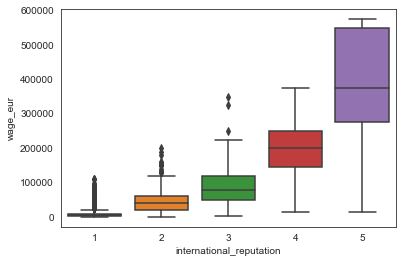

In [32]:
#international reputation vs. wage
sns.boxplot(data = train,
           x = 'international_reputation',
           y = 'wage_eur')

In [33]:
#setup crosstab
observed = pd.crosstab(train.international_reputation, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P-Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


## 7. Does contract length positively or negatively impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Contract and salary are independent.

𝐻𝑎: Contract and salary are not independent.

In [34]:
#setup crosstab
observed = pd.crosstab(train.seniority, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P-Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.
